In [ ]:
!pip install deepctr
!pip install deepctr-torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.4/392.4 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 10.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for h5py (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for h5py
Failed to build h5py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (h5py)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.7

In [ ]:
!pip install --upgrade tensorflow
from tensorflow.keras.layers import LSTM, Lambda, Layer, Dropout

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_excel("/content/parkinsons_updrs.xlsx")

In [ ]:
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
df.isnull().sum()

,0
subject#,0
age,0
sex,0
test_time,0
motor_UPDRS,0
total_UPDRS,0
Jitter(%),0
Jitter(Abs),0
Jitter:RAP,0
Jitter:PPQ5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [ ]:
!pip install mafese

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 83.0 MB/s eta 0:00:00


In [ ]:
a = df.dropna(subset=['motor_UPDRS']) # Correct usage of dropna with subset
y = df["motor_UPDRS"]

FEATURE CHECKING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(a, y, test_size=0.3, random_state=42)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)


rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the support mask of selected features
feature_support = rfe.support_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
    'Selected': feature_support
})

# Sort the DataFrame by ranking
feature_importance_df = feature_importance_df.sort_values(by='Ranking')


In [ ]:
feature_importance_df.reset_index(drop=True, inplace=True)
print(feature_importance_df)

          Feature  Ranking  Selected
0      Jitter:DDP        1      True
1     Shimmer:DDA        1      True
2     motor_UPDRS        1      True
3      Jitter:RAP        1      True
4    Shimmer:APQ3        1      True
5     Jitter(Abs)        2     False
6     Jitter:PPQ5        3     False
7       Jitter(%)        4     False
8    Shimmer:APQ5        5     False
9         Shimmer        6     False
10            NHR        7     False
11            DFA        8     False
12  Shimmer:APQ11        9     False
13            PPE       10     False
14    Shimmer(dB)       11     False
15            age       12     False
16       subject#       13     False
17    total_UPDRS       14     False
18           RPDE       15     False
19            sex       16     False
20            HNR       17     False
21      test_time       18     False


<ipython-input-17-d653b71bde10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_importance_df, palette='viridis')


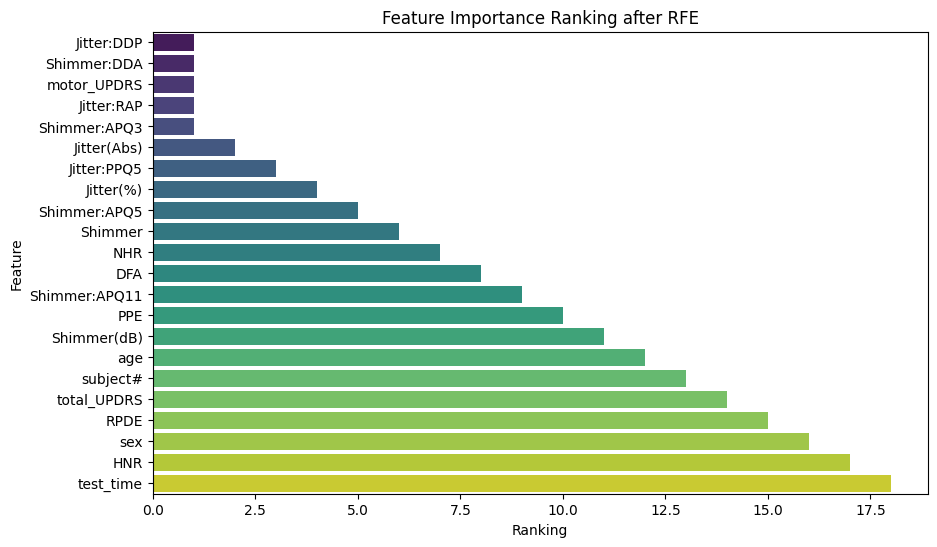

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Ranking after RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()


<ipython-input-18-5d2949a4496a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-18-5d2949a4496a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-18-5d2949a4496a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

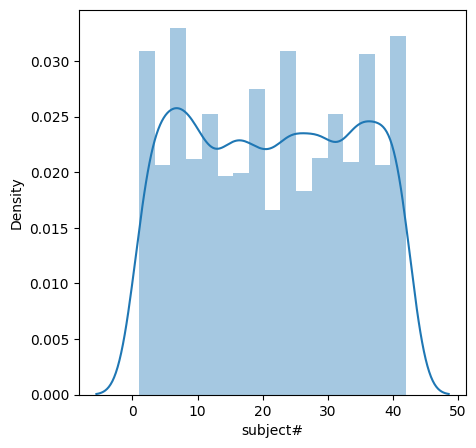

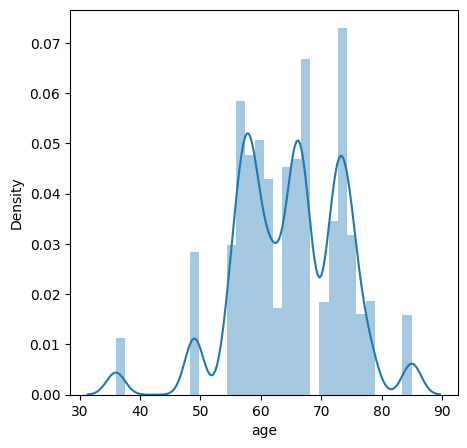

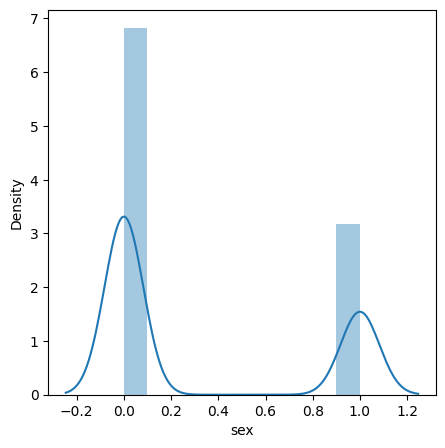

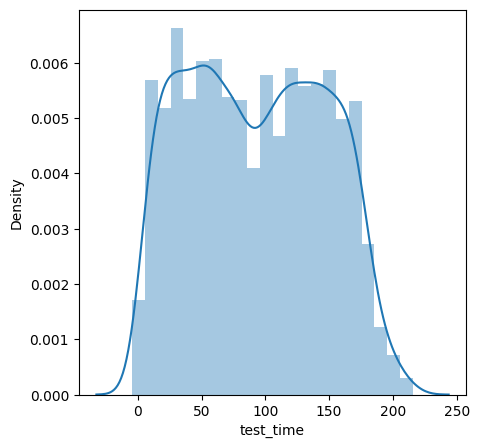

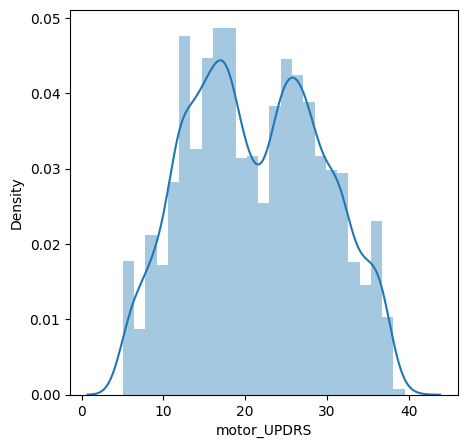

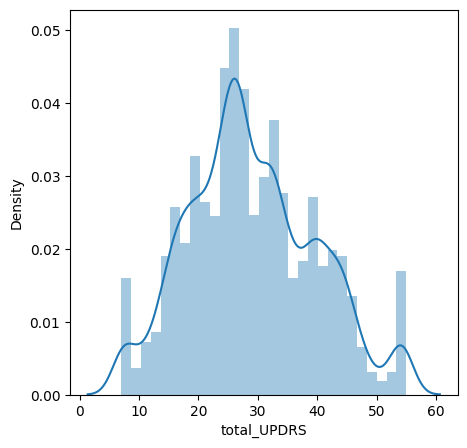

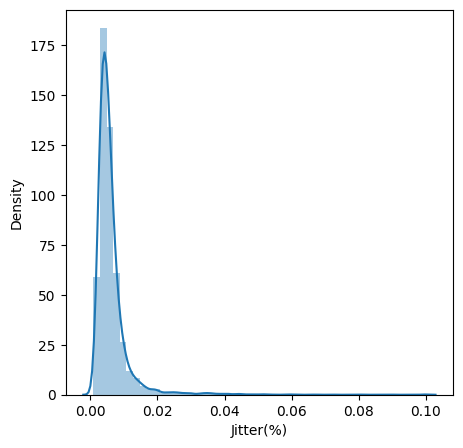

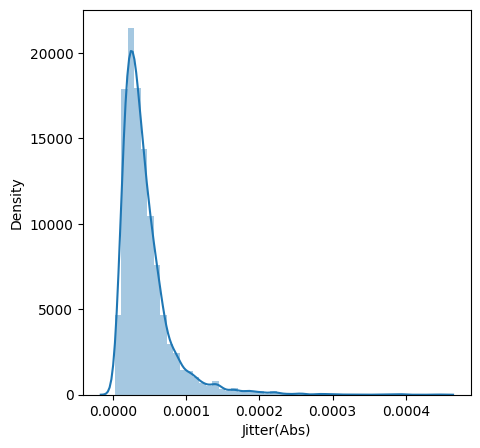

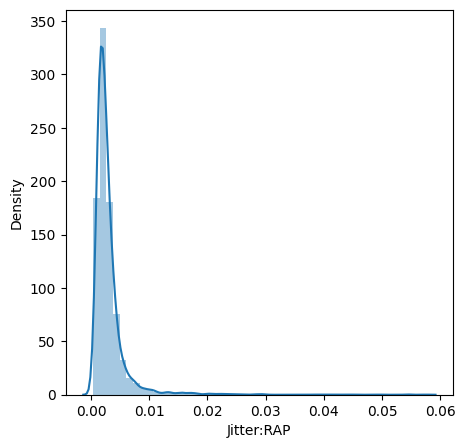

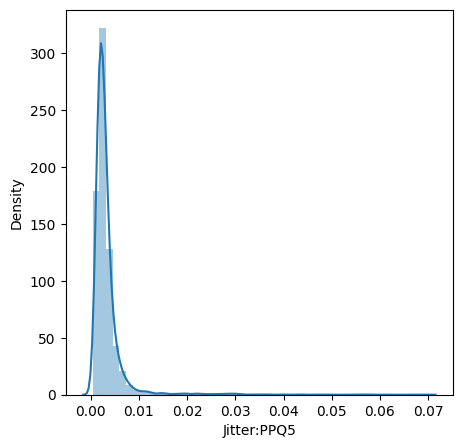

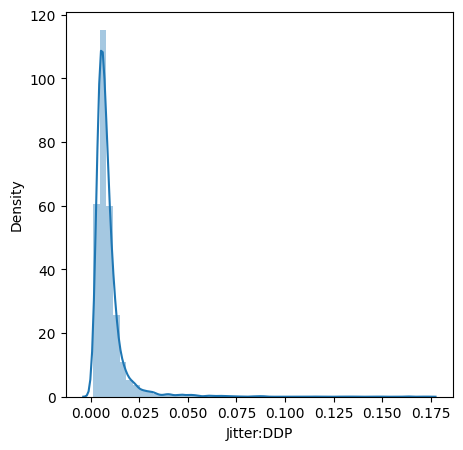

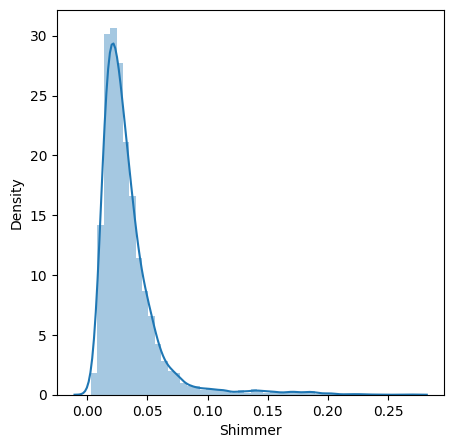

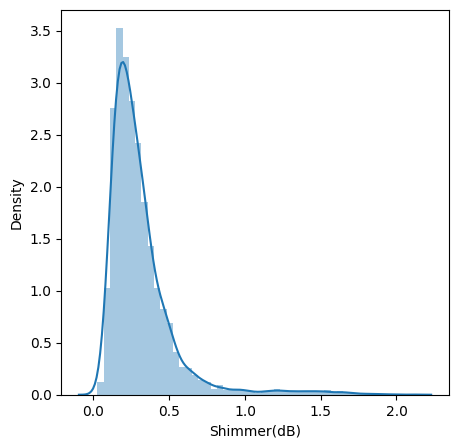

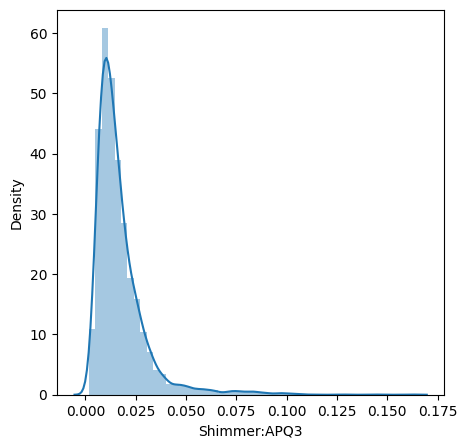

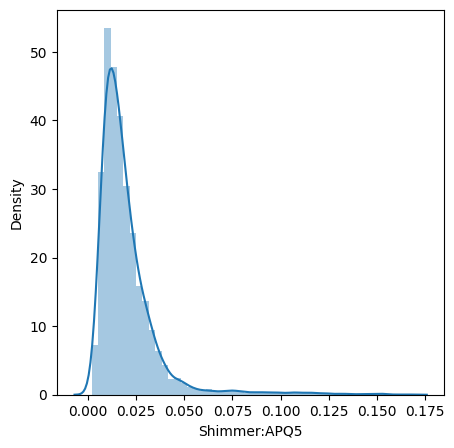

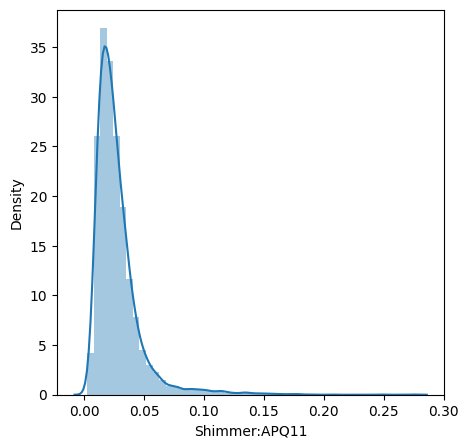

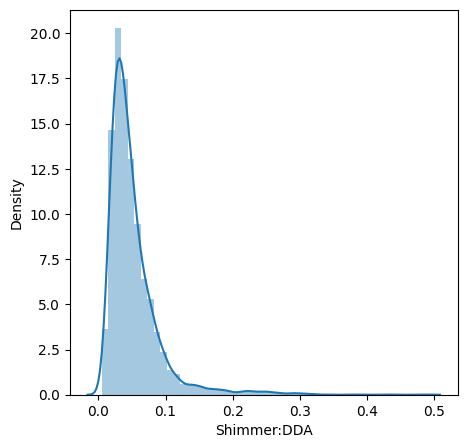

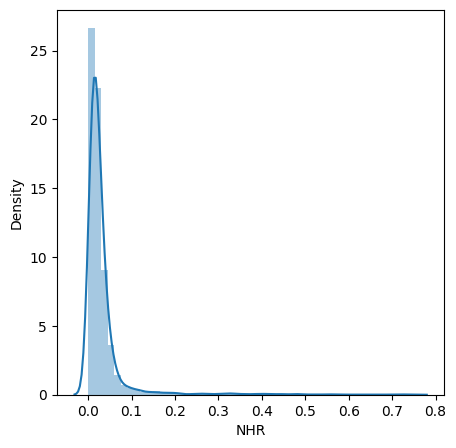

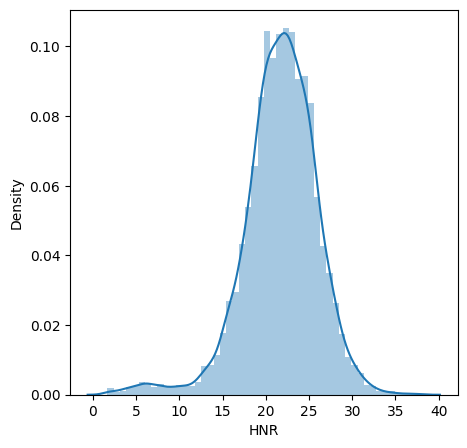

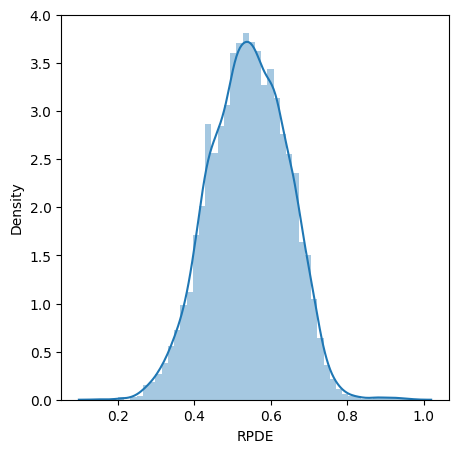

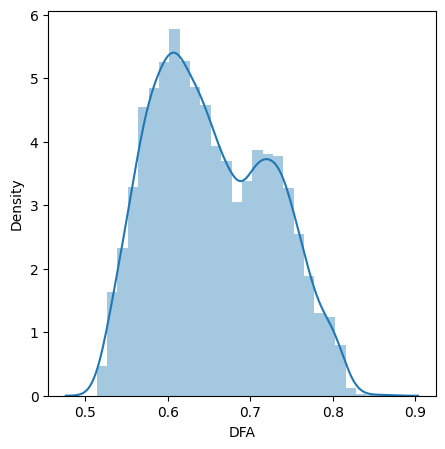

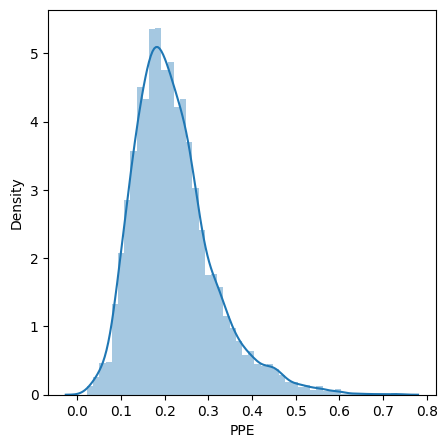

In [ ]:
for i in df.columns:
  plt.figure(figsize=(5,5))
  sns.distplot(df[i])

<ipython-input-19-2b01c07ad154>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


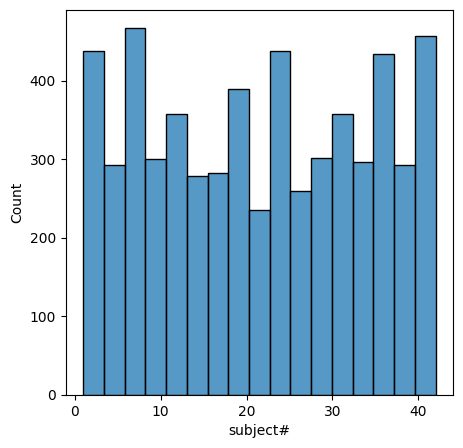

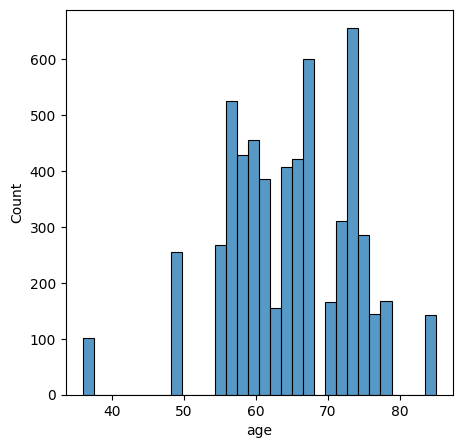

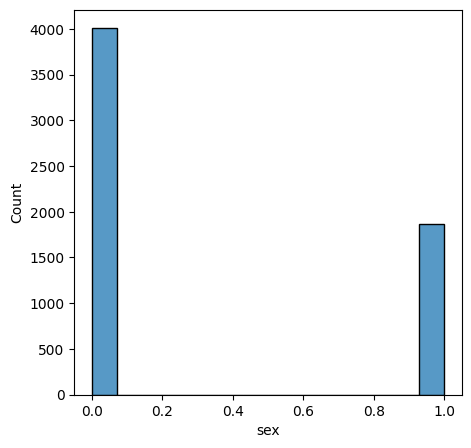

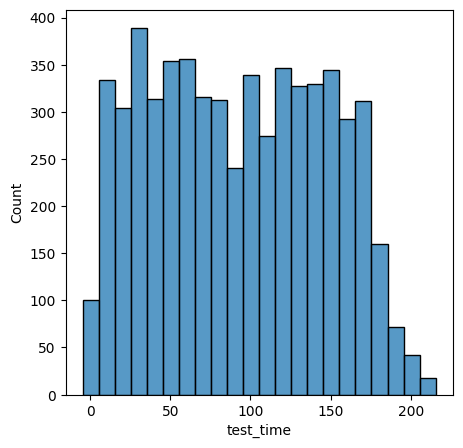

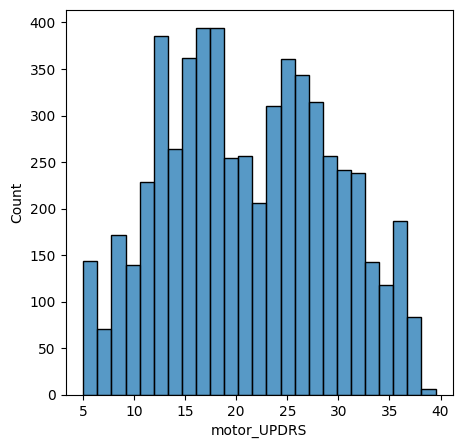

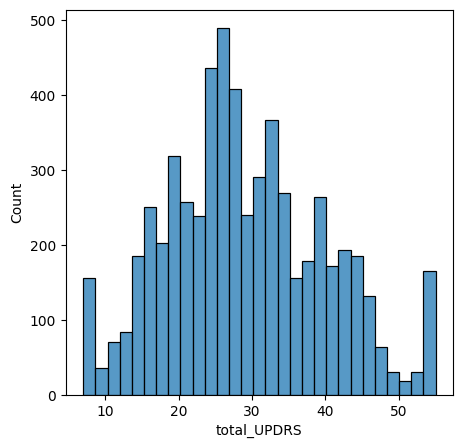

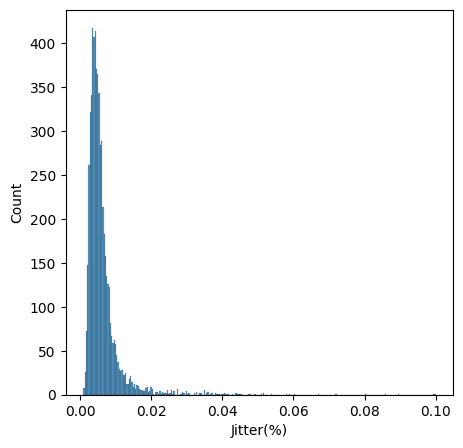

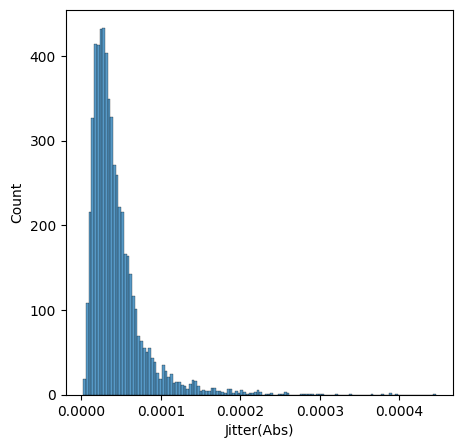

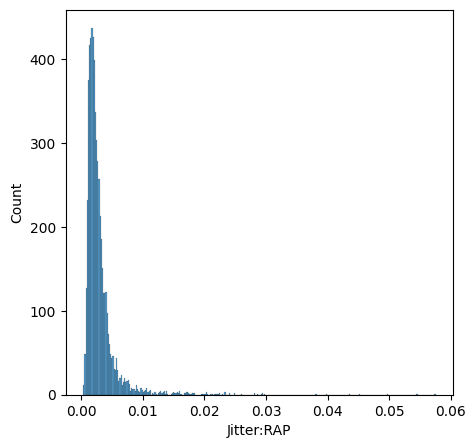

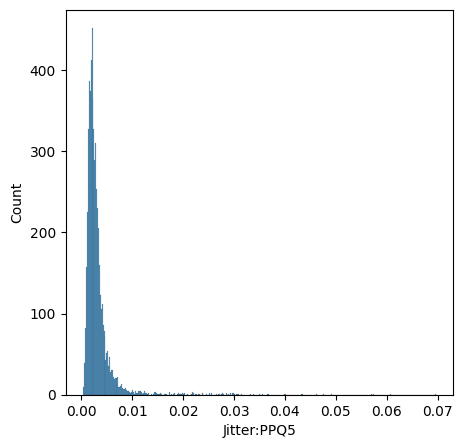

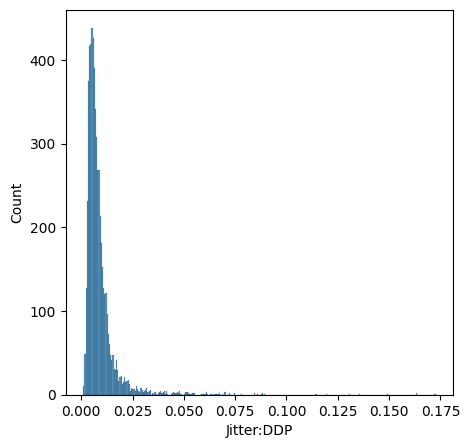

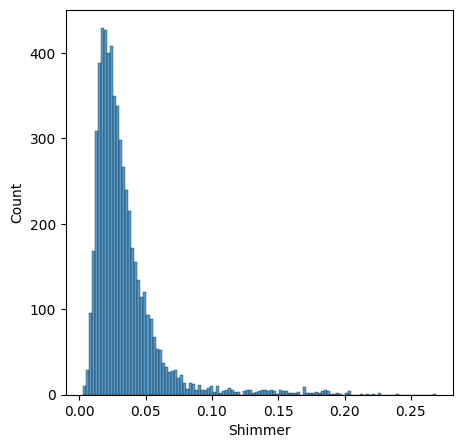

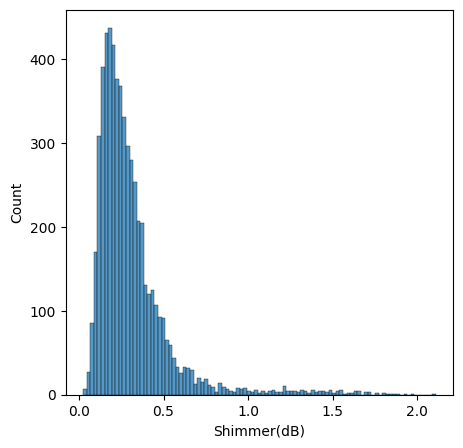

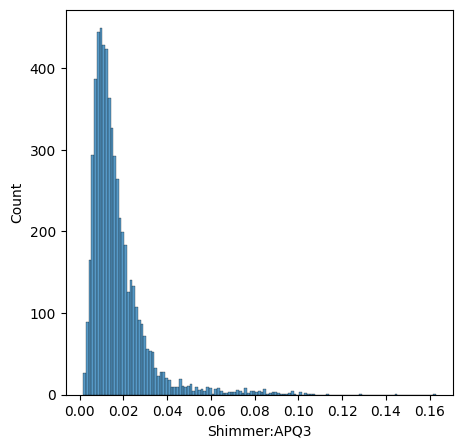

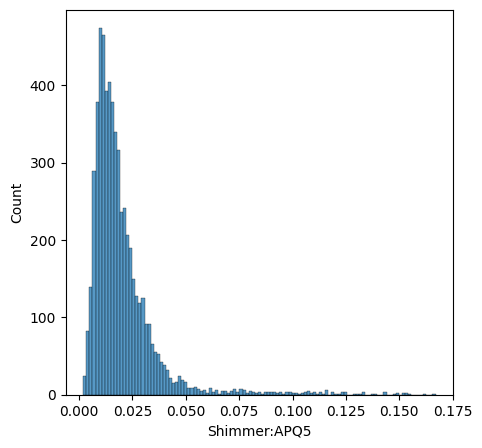

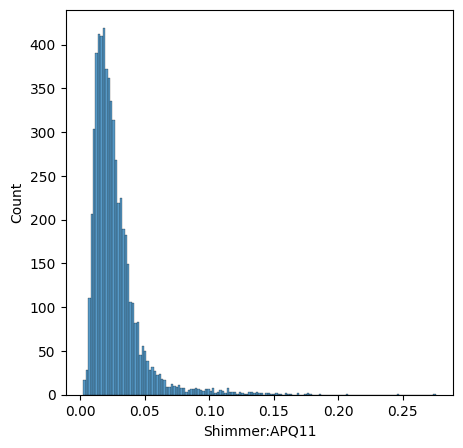

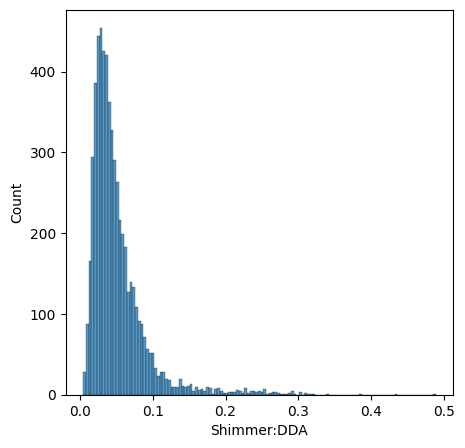

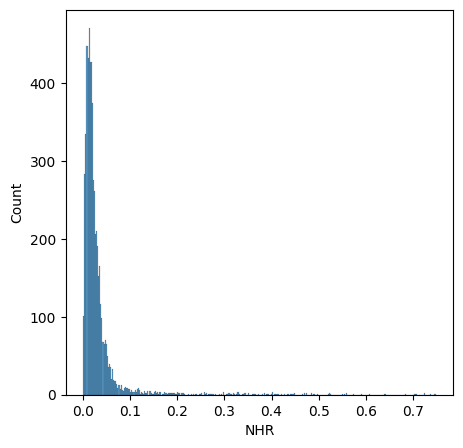

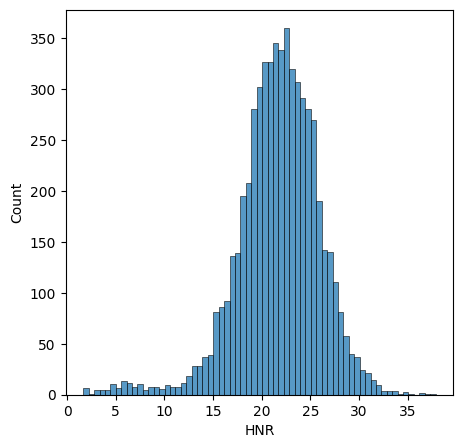

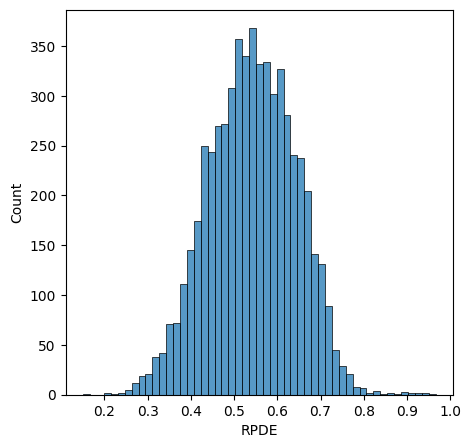

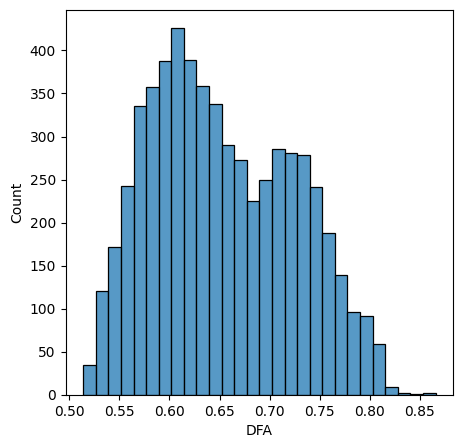

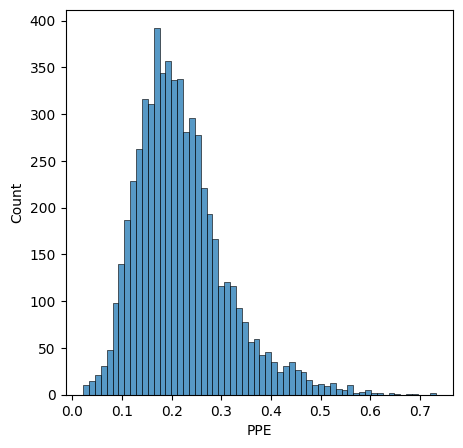

In [ ]:
for i in df.columns:
  plt.figure(figsize=(5,5))
  sns.histplot(df[i])

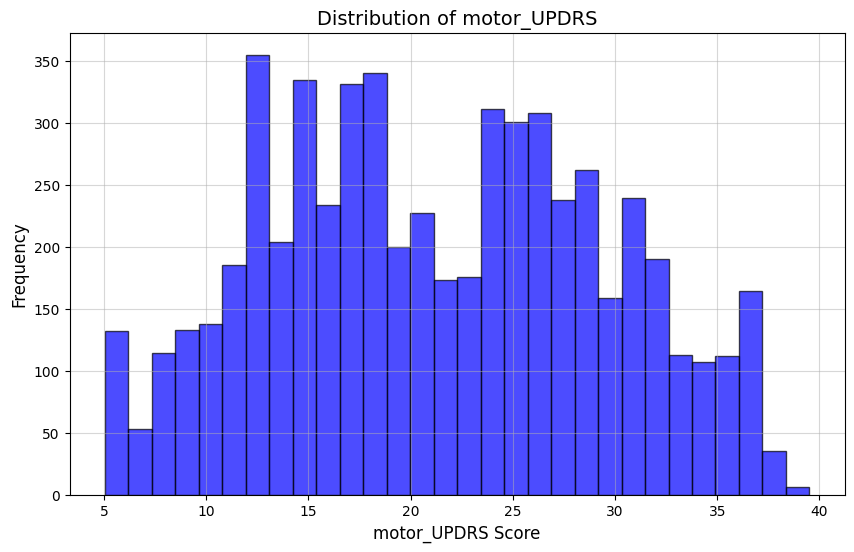

,motor_UPDRS
count,5875.000000
mean,21.296229
std,8.129282
min,5.037700
25%,15.000000
50%,20.871000
75%,27.596500
max,39.511000


In [ ]:
import matplotlib.pyplot as plt

# Statistical summary of motor_UPDRS
motor_updrs_stats = df['motor_UPDRS'].describe()

# Plot the distribution of motor_UPDRS
plt.figure(figsize=(10, 6))
plt.hist(df['motor_UPDRS'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of motor_UPDRS', fontsize=14)
plt.xlabel('motor_UPDRS Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

# Display the statistical summary
motor_updrs_stats


<ipython-input-129-2f8e1575f984>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['motor_UPDRS'], color='darkorange', fill=True, label='motor_UPDRS', shade=True)  # Darker orange
<ipython-input-129-2f8e1575f984>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['total_UPDRS'], color='darkblue', fill=True, label='total_UPDRS', shade=True)  # Darker blue


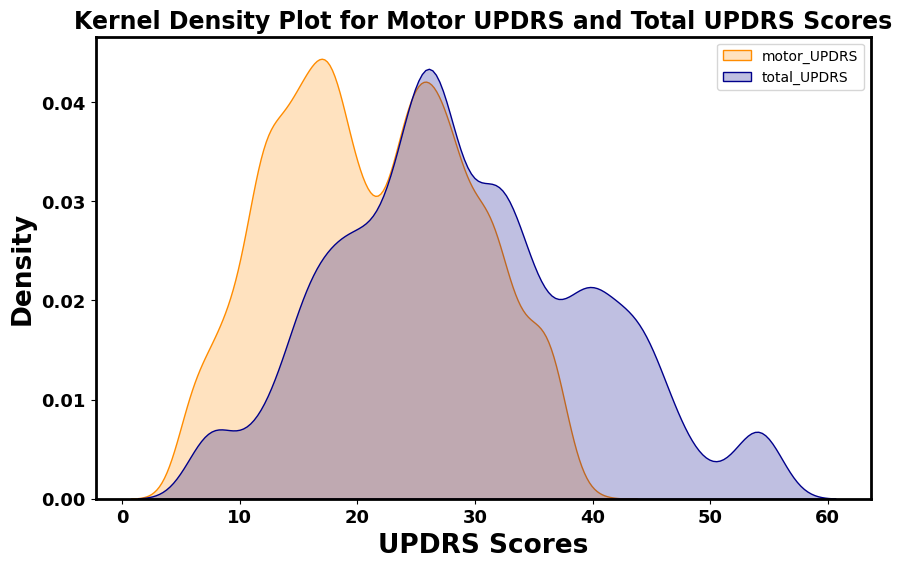

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
# Ensure 'df' is a DataFrame containing 'motor_UPDRS' and 'total_UPDRS' columns

# Create a Kernel Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(df['motor_UPDRS'], color='darkorange', fill=True, label='motor_UPDRS', shade=True)  # Darker orange
sns.kdeplot(df['total_UPDRS'], color='darkblue', fill=True, label='total_UPDRS', shade=True)  # Darker blue

# Labels and title
plt.title('Kernel Density Plot for Motor UPDRS and Total UPDRS Scores', fontweight='bold',fontsize=17)
plt.xlabel('UPDRS Scores', fontweight='bold',fontsize=19)
plt.ylabel('Density',fontweight='bold', fontsize=19)

# Set tick label font sizes
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')

# Increase thickness of x and y axis lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
df["motor_UPDRS"].describe()

,motor_UPDRS
count,5875.000000
mean,21.296229
std,8.129282
min,5.037700
25%,15.000000
50%,20.871000
75%,27.596500
max,39.511000


In [ ]:
df["total_UPDRS"].info

<bound method Series.info of 0       34.398
1       34.894
2       35.389
3       35.810
4       36.375
         ...  
5870    33.485
5871    32.988
5872    32.495
5873    32.007
5874    31.513
Name: total_UPDRS, Length: 5875, dtype: float64>

<Axes: >

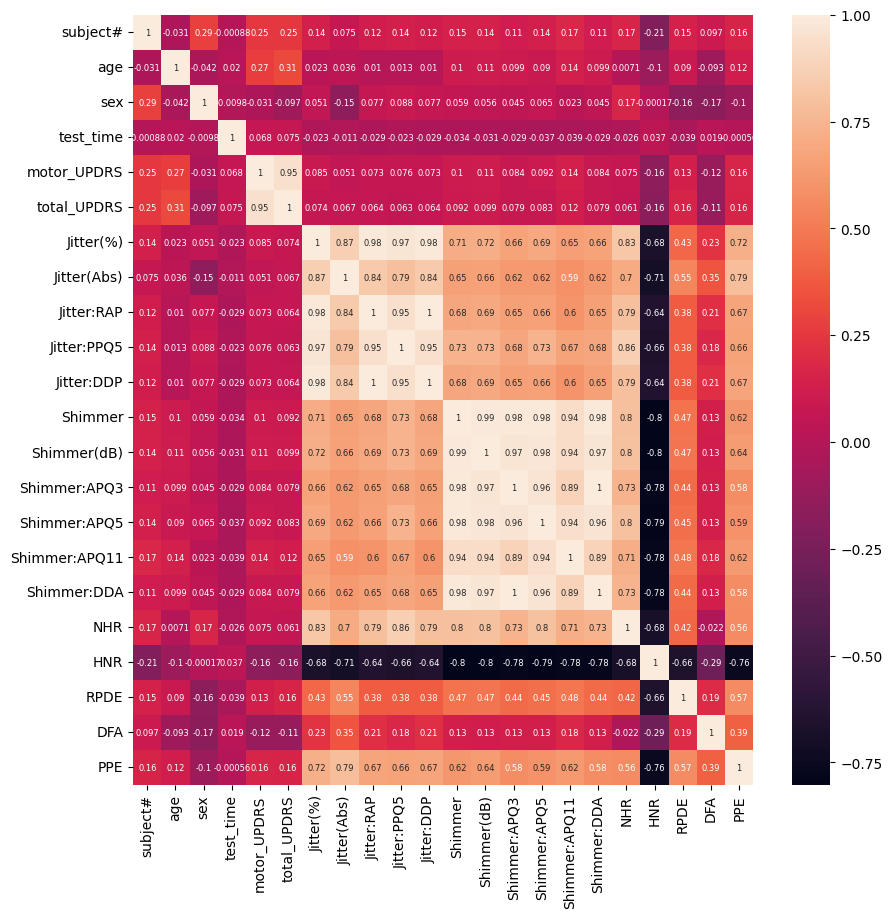

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 6})

In [ ]:
A=["motor_UPDRS","HNR","total_UPDRS","sex","test_time"]

In [ ]:
df1=df.drop(A, axis='columns')

In [ ]:
df1

,subject#,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE
0,1,72,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,0.41888,0.54842,0.16006
1,1,72,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,0.43493,0.56477,0.10810
2,1,72,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,0.46222,0.54405,0.21014
3,1,72,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,0.48730,0.57794,0.33277
4,1,72,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,0.64215,0.55314,0.21367
5871,42,61,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,0.52598,0.56518,0.12621
5872,42,61,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,0.47792,0.57888,0.14157
5873,42,61,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,0.56865,0.56327,0.14204


<Axes: >

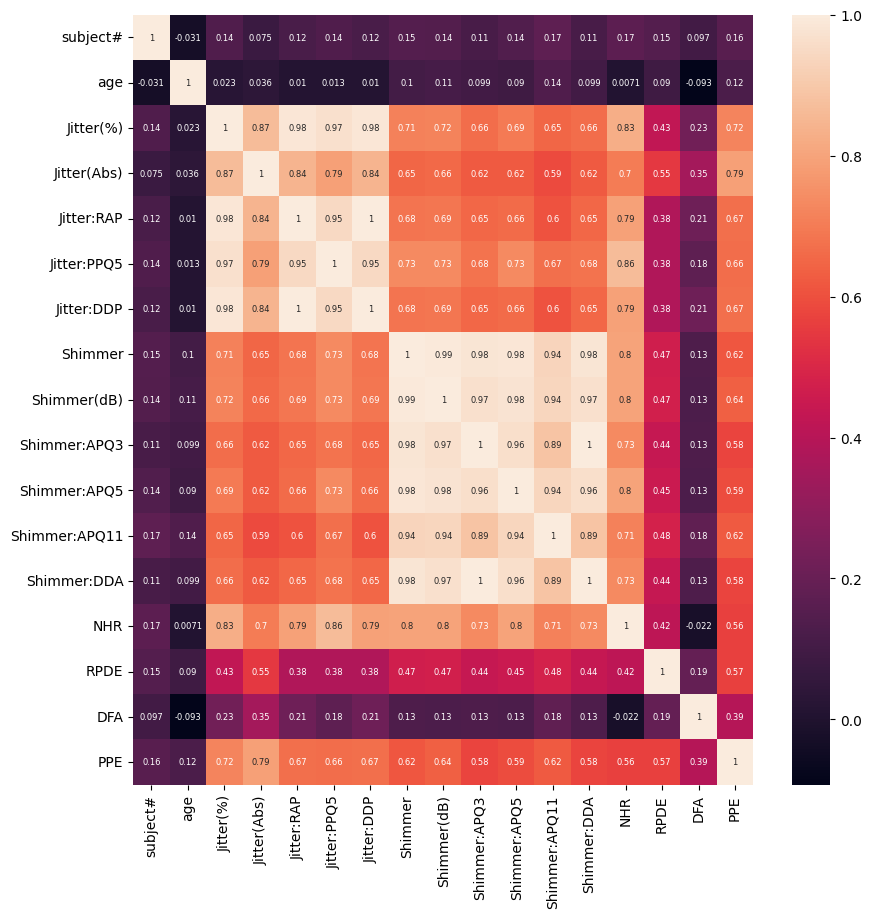

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, annot_kws={"size": 6})

In [ ]:
df1

,subject#,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE
0,1,72,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,0.41888,0.54842,0.16006
1,1,72,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,0.43493,0.56477,0.10810
2,1,72,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,0.46222,0.54405,0.21014
3,1,72,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,0.48730,0.57794,0.33277
4,1,72,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,0.64215,0.55314,0.21367
5871,42,61,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,0.52598,0.56518,0.12621
5872,42,61,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,0.47792,0.57888,0.14157
5873,42,61,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,0.56865,0.56327,0.14204


In [ ]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [ ]:
y=df["motor_UPDRS"]

In [ ]:
y.value_counts()

,count
motor_UPDRS,
15.0000,143
12.0000,131
31.0000,90
18.0000,82
6.0000,72
...,...
8.1634,1
9.5480,1
9.7018,1


In [ ]:

y.value_counts()

,count
motor_UPDRS,
15.0000,143
12.0000,131
31.0000,90
18.0000,82
6.0000,72
...,...
8.1634,1
9.5480,1
9.7018,1


MODEL WORK START

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=42)


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y=df["motor_UPDRS"]

In [ ]:
y

,motor_UPDRS
0,28.199
1,28.447
2,28.695
3,28.905
4,29.187
...,...
5870,22.485
5871,21.988
5872,21.495
5873,21.007


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)
neigh = KNeighborsRegressor(n_neighbors=15,weights="distance")
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [ ]:
y_predict_train= neigh.predict(X_train)
y_predict_test = neigh.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mae_knn= mean_absolute_error(y_test, y_predict_test)
import numpy as np
r2_knn= r2_score(y_test, y_predict_test)
print(mae_knn,r2_knn)

1.6143751711544736 0.9226530945049513


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_knn= root_mean_squared_error(y_test, y_predict_test)
knn_mse= mean_squared_error(y_test, y_predict_test)

print(rmse_knn)
print(knn_mse)

2.2219345403792223
4.936993101730226


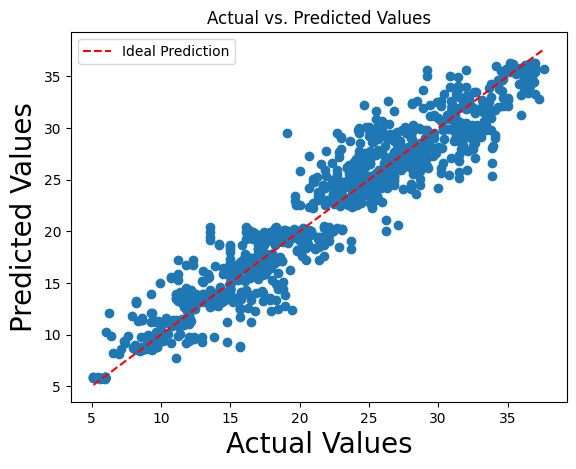

In [ ]:

plt.scatter(y_test, y_predict_test)
plt.legend(['Test'])
plt.xlabel("Actual Values", fontsize=20)  # Increased font size to 14
plt.ylabel("Predicted Values", fontsize=20) # Increased font size to 14
plt.title("Actual vs. Predicted Values") # Add title
x_line = np.linspace(min(y_test), max(y_test), 100) # Create x-axis values for the line
y_line = x_line  # For perfect prediction, y = x
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ideal Prediction') # Plot the line
plt.legend()  # Update legend to include the line

plt.show()

DICISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=10,

    random_state=0,
    max_leaf_nodes=20,
    ccp_alpha=0.01
)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=20, max_leaf_nodes=20,
                      min_samples_leaf=2, min_samples_split=10, random_state=0)

In [ ]:
y_predict_train_dt= regressor.predict(X_train)
y_predict_test_dt = regressor.predict(X_test)

In [ ]:
# y_predict_train_dt

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
mae_dt= mean_absolute_error(y_test, y_predict_test_dt)
r2_dt= r2_score(y_test, y_predict_test_dt)


In [ ]:
print(f'Mean Squared Error: {mae_dt}')
print(f'R-squared: {r2_dt}')

Mean Squared Error: 2.118964569170722
R-squared: 0.877666351703391


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_dt= root_mean_squared_error(y_test, y_predict_test_dt)
dt_mse= mean_squared_error(y_test, y_predict_test_dt)

print(rmse_dt)
print(dt_mse)

2.7943625515457713
7.808462069481394


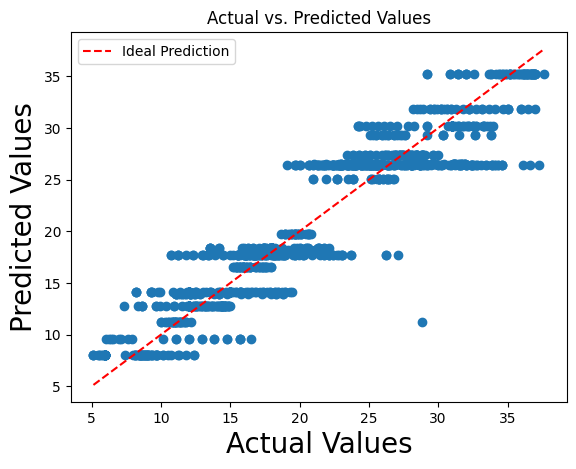

In [ ]:
plt.scatter(y_test, y_predict_test_dt)
plt.legend(['Test'])
plt.xlabel("Actual Values", fontsize=20)  # Increased font size to 14
plt.ylabel("Predicted Values", fontsize=20) # Increased font size to 14
plt.title("Actual vs. Predicted Values") # Add title
x_line = np.linspace(min(y_test), max(y_test), 100) # Create x-axis values for the line
y_line = x_line  # For perfect prediction, y = x
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ideal Prediction') # Plot the line
plt.legend()  # Update legend to include the line
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators= 100, min_samples_split= 15, min_samples_leaf= 3,  max_depth=None, bootstrap= False)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, min_samples_leaf=3, min_samples_split=15)

In [ ]:
y_predict_train_rf= regr.predict(X_train)
y_predict_test_rf = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mae_rf= mean_absolute_error(y_test, y_predict_test_rf)
r2_rf= r2_score(y_test, y_predict_test_rf)


In [ ]:
print(f'Mean absulate Error: {mae_rf}')
print(f'R-squared: {r2_rf}')

Mean absulate Error: 1.8156511117002148
R-squared: 0.8896858977110863


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_rf= root_mean_squared_error(y_test, y_predict_test_rf)
_mse= mean_squared_error(y_test, y_predict_test_rf)

print(rmse_rf)
print(_mse)

2.653537968904393
7.041263752417253


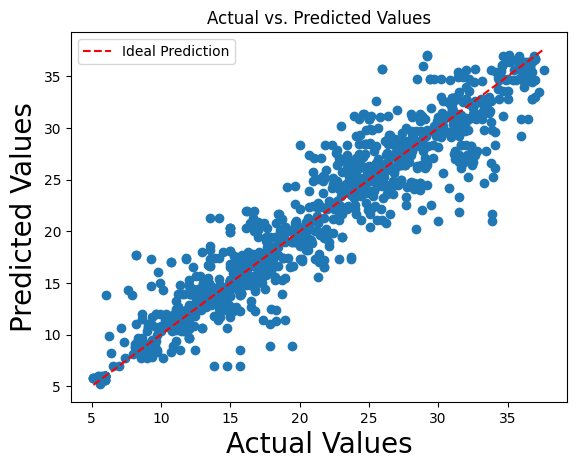

In [ ]:
plt.scatter(y_test, y_predict_test_rf)
plt.legend(['Test'])
plt.xlabel("Actual Values", fontsize=20)  # Increased font size to 14
plt.ylabel("Predicted Values", fontsize=20) # Increased font size to 14
plt.title("Actual vs. Predicted Values") # Add title
x_line = np.linspace(min(y_test), max(y_test), 100) # Create x-axis values for the line
y_line = x_line  # For perfect prediction, y = x
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ideal Prediction') # Plot the line
plt.legend()  # Update legend to include the line
plt.show()

SVM

In [ ]:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # Example parameters, tune these
svr_model.fit(X_train, y_train)



SVR(C=100, gamma=0.1)

In [ ]:
y_pred_test_svm = svr_model.predict(X_test)

mae_svm =  mean_absolute_error(y_test, y_pred_test_svm)
r2_svm = r2_score(y_test, y_pred_test_svm)

print(f'Mean Absulate Error: {mae_svm}')
print(f'R-squared: {r2_svm}')

Mean Absulate Error: 1.5629119169420402
R-squared: 0.9209203076043523


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_svm= root_mean_squared_error(y_test, y_pred_test_svm)
svm_mse= mean_squared_error(y_test, y_pred_test_svm)

print(rmse_svm)
print(svm_mse)

2.246685458226243
5.047595548205263


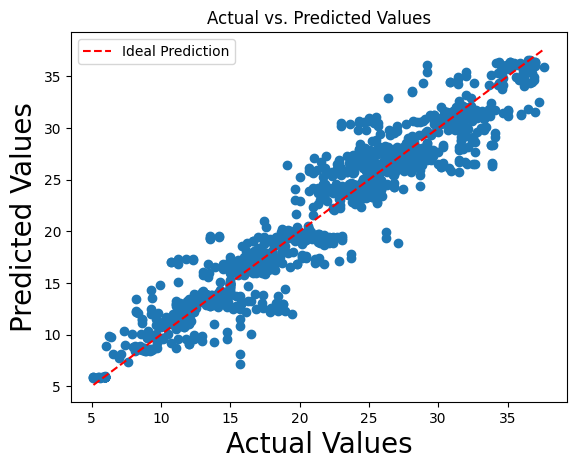

In [ ]:
plt.scatter(y_test, y_pred_test_svm)
plt.legend(['Test'])
plt.xlabel("Actual Values", fontsize=20)  # Increased font size to 14
plt.ylabel("Predicted Values", fontsize=20) # Increased font size to 14
plt.title("Actual vs. Predicted Values") # Add title
x_line = np.linspace(min(y_test), max(y_test), 100) # Create x-axis values for the line
y_line = x_line  # For perfect prediction, y = x
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ideal Prediction') # Plot the line
plt.legend()  # Update legend to include the line
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
# import numpy as np
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Assuming you have X_train, y_train from previous steps

# # Create a pipeline with scaling and the Gaussian Process Regressor
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('gpr', GaussianProcessRegressor(random_state=0))
# ])

# # Define the parameter grid for tuning
# param_grid = {
#     'gpr__kernel': [
#         RBF(),
#         ConstantKernel() * RBF(),
#         ConstantKernel() + RBF(),
#         WhiteKernel() + RBF(),
#         Matern(nu=1.5),
#         Matern(nu=2.5),
#         ConstantKernel() * Matern(nu=1.5),
#         ConstantKernel() * Matern(nu=2.5)
#     ],
#     'gpr__alpha': [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1],  # Regularization parameter
# }

# # Create and fit GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_gpr = grid_search.best_estimator_

# print("Best Parameters:", best_params)
# print("Best Estimator:", best_gpr)

# # Now you can use best_gpr to make predictions:
# # y_pred = best_gpr.predict(X_test)

naive bayes

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)

# Discretize target variable into bins
bins = np.linspace(np.min(y), np.max(y), 10)
y_binned = np.digitize(y, bins) - 1  # Adjust indices to align with bin_centers

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_binned = gnb.predict(X_test)

y_pred_binned = np.clip(y_pred_binned, 0, len(bins) - 2)

bin_centers = (bins[:-1] + bins[1:]) / 2
y_pred = bin_centers[y_pred_binned]

MAE_NB = np.sqrt(mean_absolute_error(bin_centers[y_test], y_pred))
print(f"MAE: {MAE_NB:.2f}")
r2_NB= r2_score(bin_centers[y_test], y_pred)
print(f'R-squared: {r2_NB}')

MAE: 5.08
R-squared: 0.6753207997612652


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_nb= root_mean_squared_error(bin_centers[y_test], y_pred)
_nbmse= mean_squared_error(bin_centers[y_test], y_pred)

print(rmse_nb)
print(_nbmse)

36.09028324523611
1302.50854472137


comparision plots

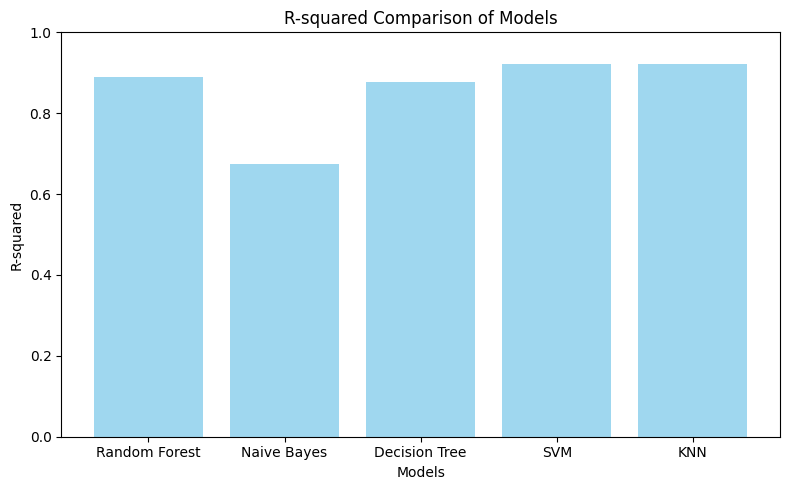

In [ ]:
import matplotlib.pyplot as plt

# Data for R² values
models = ['Random Forest','Naive Bayes', 'Decision Tree',  'SVM','KNN']
r2_values = [r2_rf,r2_NB, r2_dt,  r2_svm ,r2_knn]

# Create plot for R² values
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(models, r2_values, color='skyblue', alpha=0.8)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('R-squared')
ax.set_title('R-squared Comparison of Models')
ax.set_ylim(0, 1)  # Assuming R² values range from 0 to 1 for normalization

# Display the plot
plt.tight_layout()
plt.show()


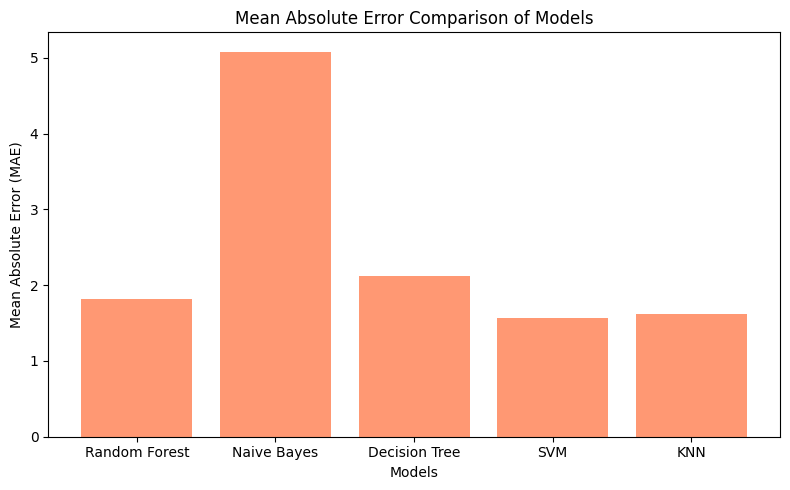

In [ ]:
import matplotlib.pyplot as plt

# Data for MAE values
models = ['Random Forest','Naive Bayes', 'Decision Tree',  'SVM','KNN']
mae_values = [mae_rf,MAE_NB, mae_dt,  mae_svm,mae_knn ]

# Create plot for MAE values
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(models, mae_values, color='coral', alpha=0.8)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Mean Absolute Error Comparison of Models')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install LibRecommender

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import DeepFM

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
y

array([ 7.07713141e+01, -5.16042361e+01, -3.70004475e+01, -8.35350988e+01,
       -8.34003936e+01, -2.98034414e+01,  1.39544530e+01,  7.53190111e+01,
        5.45322179e+01, -2.07873963e+01, -8.46212394e+00, -7.96709999e+01,
        3.46824161e+01,  5.60525884e+01,  1.01051222e+02,  5.80089365e+01,
       -9.62772927e+01, -4.96066392e+01, -6.39929480e+01, -7.84383260e+01,
       -1.38896657e+02, -5.07716085e+01, -3.96061955e+00,  2.61571065e+01,
        1.07903547e+01,  2.34961877e+01,  7.04062327e+01, -3.13028419e+01,
       -2.40964214e+01, -6.19211237e+01, -8.99192667e+01,  1.73886234e+01,
       -4.03571036e+01,  2.76715281e+01,  1.02152889e+02, -5.17871867e+01,
        1.87199998e+01, -1.33912754e+02, -7.00407353e+01,  1.64988411e+02,
        1.17468969e+02, -3.07706682e+01,  6.32037011e+01, -3.18915776e+01,
       -9.14314330e+01, -9.49645044e+01, -1.13589476e+01,  6.68290992e+01,
        1.12549023e+02,  9.74490623e+01, -1.73154485e+01,  3.21844081e+01,
        6.18732073e+01, -

In [ ]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [ ]:
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
import pandas as pd
from deepctr_torch.models import DeepFM
from deepctr_torch.inputs import DenseFeat, get_feature_names
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
# from deepctr.models import DeepFM
# from deepctr.feature_column import DenseFeat, get_feature_names
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
A=["HNR","total_UPDRS","sex","test_time"]
data= df.drop(A, axis= 'columns')

DEEPFM

In [ ]:
target = 'motor_UPDRS'
features = [col for col in data.columns if col != target]

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Prepare feature columns for DeepFM
feature_columns = [DenseFeat(feat, 1) for feat in features]
feature_names = get_feature_names(feature_columns)

# Create input data for the model
train_model_input = {name: train_data[name].values for name in feature_names}
test_model_input = {name: test_data[name].values for name in feature_names}

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Define the model
model = DeepFM(linear_feature_columns=feature_columns,
               dnn_feature_columns=feature_columns,
               task='regression')

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

history = model.fit(train_model_input, train_data[target].values,
                    batch_size=8, epochs=50,
                    validation_split=0.1)

train_pred = model.predict(train_model_input, batch_size=16)
train_mse = mean_squared_error(train_data[target].values, train_pred)
train_mae = mean_absolute_error(train_data[target].values, train_pred)
train_r2 = r2_score(train_data[target].values, train_pred)
test_pred = model.predict(test_model_input, batch_size=16)
test_mse = mean_squared_error(test_data[target].values, test_pred)
test_r2 = r2_score(test_data[target].values, test_pred)
trainr2 = r2_score(train_data[target].values, model.predict(train_model_input, batch_size=32))
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train R^2 Score: {trainr2}")

# Save predictions
test_data['Predicted'] = test_pred
test_data[['motor_UPDRS', 'Predicted']].to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

cpu
Train on 4230 samples, validate on 470 samples, 529 steps per epoch


529it [00:01, 288.85it/s]


Epoch 1/50
1s - loss:  111.4011


529it [00:01, 319.69it/s]


Epoch 2/50
1s - loss:  53.6477


529it [00:01, 339.52it/s]


Epoch 3/50
1s - loss:  50.0303


529it [00:01, 338.65it/s]


Epoch 4/50
1s - loss:  44.9155


529it [00:01, 317.43it/s]


Epoch 5/50
1s - loss:  41.3192


529it [00:02, 235.78it/s]


Epoch 6/50
2s - loss:  38.6004


529it [00:01, 272.62it/s]


Epoch 7/50
1s - loss:  37.2153


529it [00:01, 332.06it/s]


Epoch 8/50
1s - loss:  36.0654


529it [00:01, 347.17it/s]


Epoch 9/50
1s - loss:  35.3662


529it [00:01, 312.29it/s]


Epoch 10/50
1s - loss:  34.9214


529it [00:01, 307.55it/s]


Epoch 11/50
1s - loss:  33.9229


529it [00:01, 347.91it/s]


Epoch 12/50
1s - loss:  33.5436


529it [00:02, 220.90it/s]


Epoch 13/50
2s - loss:  33.6446


529it [00:01, 286.72it/s]


Epoch 14/50
1s - loss:  33.1880


529it [00:01, 314.68it/s]


Epoch 15/50
1s - loss:  33.0990


529it [00:01, 311.28it/s]


Epoch 16/50
1s - loss:  32.8521


529it [00:01, 323.30it/s]


Epoch 17/50
1s - loss:  32.7272


529it [00:01, 307.69it/s]


Epoch 18/50
1s - loss:  32.4270


529it [00:01, 298.37it/s]


Epoch 19/50
1s - loss:  32.2655


529it [00:02, 212.57it/s]


Epoch 20/50
2s - loss:  32.0187


529it [00:01, 312.43it/s]


Epoch 21/50
1s - loss:  31.9465


529it [00:01, 322.90it/s]


Epoch 22/50
1s - loss:  31.7989


529it [00:01, 334.79it/s]


Epoch 23/50
1s - loss:  31.4302


529it [00:01, 297.27it/s]


Epoch 24/50
1s - loss:  31.3924


529it [00:01, 316.83it/s]


Epoch 25/50
1s - loss:  30.8758


529it [00:01, 272.95it/s]


Epoch 26/50
2s - loss:  30.6761


529it [00:02, 225.61it/s]


Epoch 27/50
2s - loss:  29.6304


529it [00:01, 326.88it/s]


Epoch 28/50
1s - loss:  28.6824


529it [00:01, 316.57it/s]


Epoch 29/50
1s - loss:  27.8285


529it [00:01, 319.88it/s]


Epoch 30/50
1s - loss:  27.0872


529it [00:01, 311.93it/s]


Epoch 31/50
1s - loss:  26.3732


529it [00:01, 341.26it/s]


Epoch 32/50
1s - loss:  25.5256


529it [00:02, 248.69it/s]


Epoch 33/50
2s - loss:  24.4893


529it [00:02, 245.82it/s]


Epoch 34/50
2s - loss:  23.6279


529it [00:01, 305.92it/s]


Epoch 35/50
1s - loss:  22.8078


529it [00:01, 324.67it/s]


Epoch 36/50
1s - loss:  21.8787


529it [00:01, 330.79it/s]


Epoch 37/50
1s - loss:  21.0561


529it [00:01, 340.23it/s]


Epoch 38/50
1s - loss:  20.1476


529it [00:01, 343.58it/s]


Epoch 39/50
1s - loss:  20.5496


529it [00:02, 246.75it/s]


Epoch 40/50
2s - loss:  19.9489


529it [00:02, 258.58it/s]


Epoch 41/50
2s - loss:  19.0903


529it [00:01, 318.49it/s]


Epoch 42/50
1s - loss:  18.8072


529it [00:01, 330.47it/s]


Epoch 43/50
1s - loss:  18.5804


529it [00:01, 318.86it/s]


Epoch 44/50
1s - loss:  17.6646


529it [00:01, 326.62it/s]


Epoch 45/50
1s - loss:  17.4472


529it [00:01, 314.84it/s]


Epoch 46/50
1s - loss:  17.3562


529it [00:02, 225.36it/s]


Epoch 47/50
2s - loss:  16.8083


529it [00:01, 271.95it/s]


Epoch 48/50
1s - loss:  16.4619


529it [00:01, 329.14it/s]


Epoch 49/50
1s - loss:  15.7265


529it [00:01, 322.46it/s]


Epoch 50/50
1s - loss:  15.8034
Test Mean Squared Error: 15.725790144780712
Test R^2 Score: 0.7536271209823969
Train R^2 Score: 0.7880741936933648
Predictions saved to predictions.csv


In [ ]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data

,subject#,age,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE
0,1,72,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,0.41888,0.54842,0.16006
1,1,72,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,0.43493,0.56477,0.10810
2,1,72,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,0.46222,0.54405,0.21014
3,1,72,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,0.48730,0.57794,0.33277
4,1,72,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,22.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,0.64215,0.55314,0.21367
5871,42,61,21.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,0.52598,0.56518,0.12621
5872,42,61,21.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,0.47792,0.57888,0.14157
5873,42,61,21.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,0.56865,0.56327,0.14204


In [ ]:
y=df["motor_UPDRS"]
y

,motor_UPDRS
0,28.199
1,28.447
2,28.695
3,28.905
4,29.187
...,...
5870,22.485
5871,21.988
5872,21.495
5873,21.007


In [ ]:
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
# #

In [ ]:
train_data= lgb.Dataset(X_train,label =y_train)
test_data = lgb.Dataset(X_test,label= y_test, reference=train_data)

LIGHTGBM

In [ ]:
import re
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are pandas DataFrames/Series
X_train = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

# Create LightGBM Datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 15,
    'learning_rate': 0.01,
    'feature_fraction': 0.8
}

# Train the model
model = lgb.train(
    params,
    train_set=train_data,
    valid_sets=[test_data],
    # early_stopping_rounds=50,
    num_boost_round=150
)

# Evaluate the model
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

mae_ = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MAE: {mae_}")
print(f"MSE: {mse}")
print(f"R²_train: {r2_train}")
print(f"R²_test: {r2_test}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4147
[LightGBM] [Info] Number of data points in the train set: 4700, number of used features: 18
[LightGBM] [Info] Start training from score 21.332631
MAE: 1.6938468911335347
MSE: 4.053300496566707
R²_train: 0.9356730673393094
R²_test: 0.9364977337438236


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'num_leaves': [7, 15, 31],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'feature_fraction': [0.6, 0.7, 0.8]
# }

# grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(),
#                            param_grid=param_grid,
#                            scoring='neg_mean_squared_error',
#                            cv=5,
#                            verbose=2)

# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print(best_params)

HYBRIDE

In [ ]:

# Step 1: Train DeepFM and LightGBM
if isinstance(train_model_input, dict):
    X_train = pd.DataFrame(X_train)
if isinstance(test_model_input, dict):
    X_test = pd.DataFrame(X_test)
train_pred_deepfm = model.predict(X_train, batch_size=32)
test_pred_deepfm = model.predict(X_test, batch_size=32)

# Predictions from LightGBM
train_pred_lgb = model.predict(X_train, num_iteration=model.best_iteration)
test_pred_lgb = model.predict(X_test, num_iteration=model.best_iteration)

# Step 2: Create meta-model input
train_meta_features = np.column_stack((train_pred_deepfm, train_pred_lgb))
test_meta_features = np.column_stack((test_pred_deepfm, test_pred_lgb))

# Step 3: Define and train the meta-model
meta_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=3)
meta_model.fit(train_meta_features, y_train)

# Step 4: Make final predictions with the meta-model
final_train_pred = meta_model.predict(train_meta_features)
final_test_pred = meta_model.predict(test_meta_features)

train_mae = mean_absolute_error(y_train, final_train_pred)
test_mae = mean_absolute_error(y_test, final_test_pred)
final_train_mse = mean_squared_error(y_train, final_train_pred)
final_test_mse = mean_squared_error(y_test, final_test_pred)
final_train_r2 = r2_score(y_train, final_train_pred)
final_test_r2 = r2_score(y_test, final_test_pred)

print(f"Final Train MSE: {final_train_mse}")
print(f"Final Test MSE: {final_test_mse}")
print(f"Final Train R^2: {final_train_r2}")
print(f"Final Test R^2: {final_test_r2}")

# Save final predictions
final_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_test_pred
})
final_predictions.to_csv('hybrid_model_predictions.csv', index=False)
print("Hybrid model predictions saved to hybrid_model_predictions.csv")


[LightGBM] [Warning] Unknown parameter: batch_size
[LightGBM] [Warning] Unknown parameter: batch_size
Final Train MSE: 1.5490055917211851
Final Test MSE: 1.4840534971709325
Final Train R^2: 0.9767516167753238
Final Test R^2: 0.9767496240667122
Hybrid model predictions saved to hybrid_model_predictions.csv


<ipython-input-171-a99e5c608dcd>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold', fontsize=10)
<ipython-input-171-a99e5c608dcd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=10)


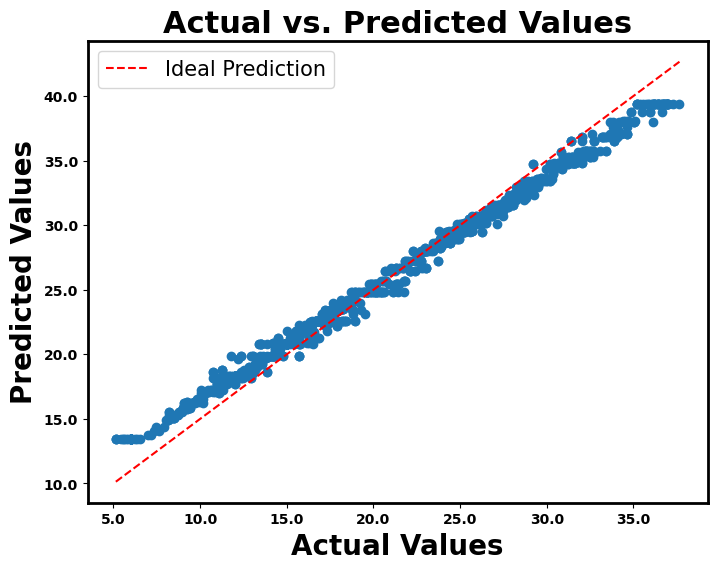

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and final_test_pred are defined earlier

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_test_pred)
plt.legend(['Test'], fontsize=20)  # Bold legend
plt.xlabel("Actual Values", fontweight='bold', fontsize=20)  # Bold and increased font size
plt.ylabel("Predicted Values", fontweight='bold', fontsize=20)  # Bold and increased font size
plt.title("Actual vs. Predicted Values", fontweight='bold', fontsize=22)  # Bold title

# Get the current axis
ax = plt.gca()

# Set x and y tick labels with bold and increased font size
ax.set_xticklabels(ax.get_xticks(), fontweight='bold', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=10)

# Create x-axis values for the line
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  # For perfect prediction, y = x
plt.plot(x_line, y_line, color='red', linestyle='--', label='Ideal Prediction')  # Plot the line
plt.legend(fontsize=15)  # Update legend to include the line and make it bold

# Increase thickness of x and y axis lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

rmse_hyb= root_mean_squared_error(y_train, final_train_pred)
hyb_mse= mean_squared_error(y_train, final_train_pred)

print(rmse_hyb)
print(test_mae)

1.244590531749774
1.0172384489608637


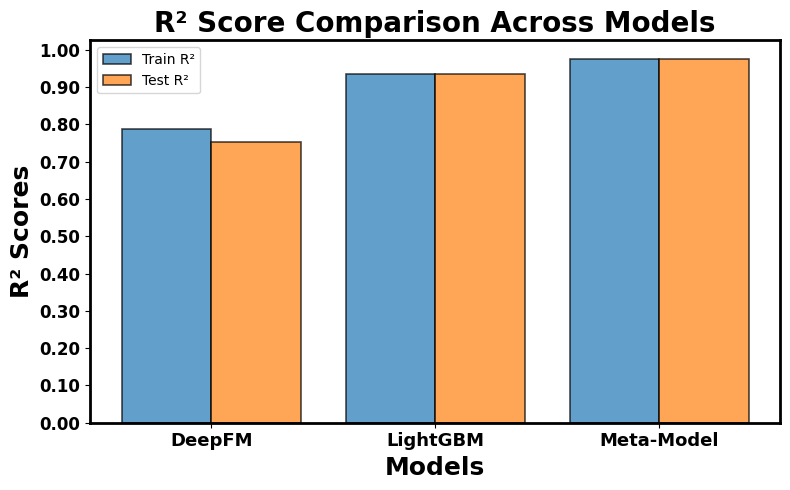

In [ ]:
# Assuming the R² values are correctly defined earlier
train_r2_model1 = trainr2
test_r2_model1 = test_r2

train_r2_model2 = r2_train
test_r2_model2 = r2_test

train_r2_hybrid = final_train_r2
test_r2_hybrid = final_test_r2

train_r2_scores = [train_r2_model1, train_r2_model2, train_r2_hybrid]
test_r2_scores = [test_r2_model1, test_r2_model2, test_r2_hybrid]

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

models = ['DeepFM', 'LightGBM', 'Meta-Model']
x = np.arange(len(models))  # the label locations
width = 0.4  # the width of the bars

# Plot R² values for train and test sets
ax.bar(x - width / 2, train_r2_scores, width, label='Train R²', alpha=0.7,edgecolor='black', linewidth=1.2)
ax.bar(x + width / 2, test_r2_scores, width, label='Test R²', alpha=0.7,edgecolor='black', linewidth=1.2)

# Set X-axis labels with bold font and font size 15
ax.set_xticks(x)
ax.set_xticklabels(models, fontweight='bold', fontsize=13)

# Y-axis labels (R² values) should be based on tick positions
ax.set_yticks(np.linspace(0, 1, 11))  # Set y-ticks for R² values from 0 to 1
ax.set_yticklabels([f'{val:.2f}' for val in np.linspace(0, 1, 11)], fontweight='bold', fontsize=12)

# Set X and Y labels with bold font and increased font size
ax.set_xlabel('Models', fontsize=18, fontweight='bold')
ax.set_ylabel('R² Scores', fontsize=18, fontweight='bold')

# Title with bold font and increased font size
ax.set_title('R² Score Comparison Across Models', fontweight='bold', fontsize=20)

# Show the legend with a smaller font size
ax.legend(fontsize=10)

# Increase the thickness of axis lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Adjust layout to ensure everything fits properly
plt.tight_layout()

# Show the plot
plt.show()


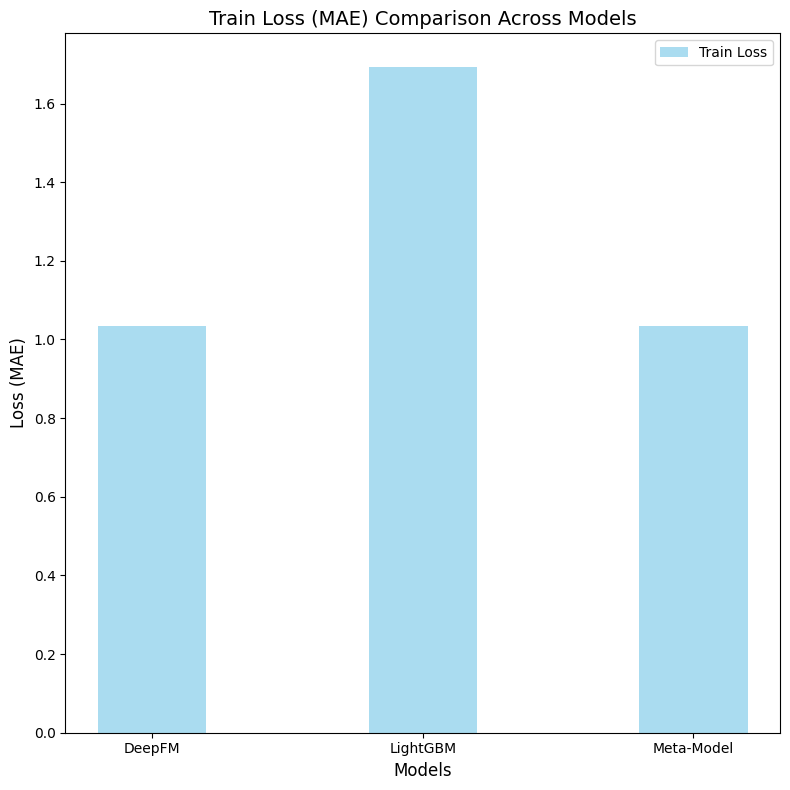

In [ ]:
train_loss_model1 = train_mae

train_loss_model2 =mae_

train_loss_hybrid = train_mae

train_loss_scores = [train_loss_model1, train_loss_model2, train_loss_hybrid]

fig, ax = plt.subplots(figsize=(8, 8))
models = ['DeepFM', 'LightGBM', 'Meta-Model']
x = np.arange(len(models))
width = 0.4
ax.bar(x, train_loss_scores, width, label='Train Loss', alpha=0.7, color='skyblue')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Loss (MAE)', fontsize=12)
ax.set_title('Train Loss (MAE) Comparison Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10)


plt.tight_layout()
plt.show()


<ipython-input-133-dc759beb6174>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models,fontweight='bold', fontsize =15)
<ipython-input-133-dc759beb6174>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_r2_values, fontweight='bold',fontsize=15)


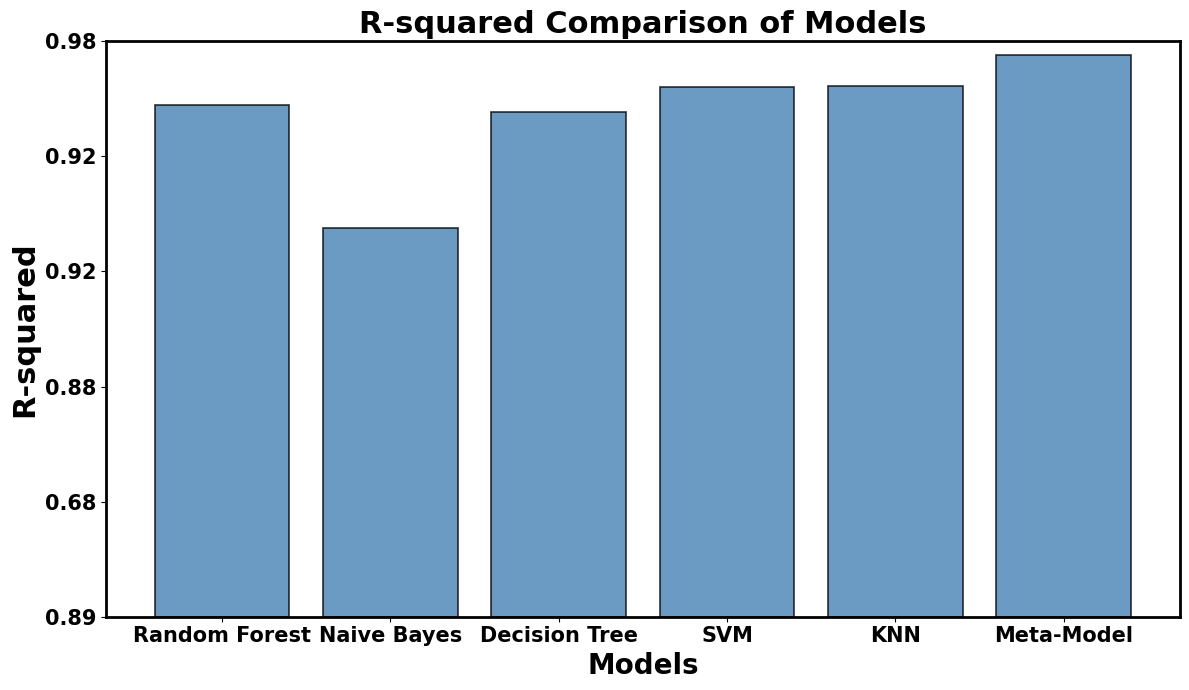

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest','Naive Bayes', 'Decision Tree',  'SVM','KNN','Meta-Model']
r2_values = [r2_rf,r2_NB, r2_dt,  r2_svm ,r2_knn,final_test_r2]

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(models, r2_values, color='#4682B4', alpha=0.8,edgecolor='black', linewidth=1.2)  # Steelblue hex code

ax.set_xticklabels(models,fontweight='bold', fontsize =15)
formatted_r2_values = [f'{val:.2f}' for val in r2_values]

# ... (your existing code) ...

ax.set_yticklabels(formatted_r2_values, fontweight='bold',fontsize=15)
ax.set_xlabel('Models',fontweight='bold',fontsize=20)
ax.set_ylabel('R-squared',fontweight='bold',fontsize=22)
ax.set_title('R-squared Comparison of Models',fontweight='bold',fontsize= 22)
ax.set_ylim(0, 1)
plt.tight_layout()

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()


<ipython-input-148-f8bbcf3df1d9>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models,fontweight='bold', fontsize =15)
<ipython-input-148-f8bbcf3df1d9>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_mae_values, fontweight='bold',fontsize=15)


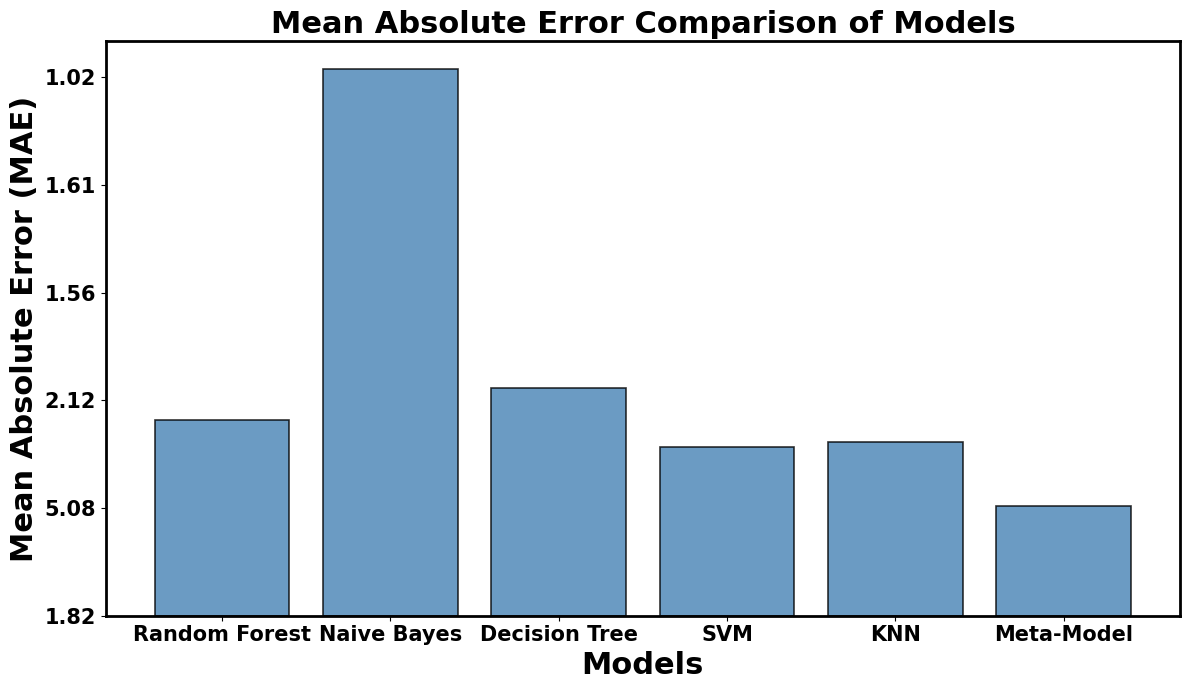

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest','Naive Bayes', 'Decision Tree',  'SVM','KNN', 'Meta-Model']
mae_values = [mae_rf,MAE_NB, mae_dt,  mae_svm,mae_knn,test_mae ]

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xticklabels(models,fontweight='bold', fontsize =15)
formatted_mae_values = [f'{val:.2f}' for val in mae_values]

ax.set_yticklabels(formatted_mae_values, fontweight='bold',fontsize=15)

ax.bar(formatted_mae_values, mae_values,color='#4682B4',edgecolor='black', linewidth=1.2, alpha=0.8)

ax.set_xlabel('Models',fontweight='bold',fontsize=22)
ax.set_ylabel('Mean Absolute Error (MAE)',fontweight='bold',fontsize=22)
ax.set_title('Mean Absolute Error Comparison of Models',fontweight='bold',fontsize=22)

plt.tight_layout()

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()
